# Predicting House Pricing with different machine learning models

First of all we import the needed libraries

In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 
import sklearn


We read the data with pandas

In [36]:
data = pd.read_csv('airbnb-listings-extract.csv', sep=';')


First approach to database should be know how big it is (shape, dimensions (column names/number))

In [37]:
data.shape

(14780, 89)

We have a database with many columns (89) but we also have many entries/documents/registers, so we shouldn't have problems with dimensionality. Anyways, we need to analize columnms to see if we have redundant information (all that'll come after splitting data)

In [38]:
data.head() #First sight of database

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


In [39]:
data['ID'].nunique() #Just checking if there is some ID duplicates, not the case, all have uniques ID's

14780

Time to split

In [40]:
from sklearn.model_selection import train_test_split

                                                                                              
#For better practice, and prevent data leakage, I'll separate the train and test data into separate csv files

train, test = train_test_split(data, test_size=0.25, shuffle=True, random_state=0) #randomstate to make the model replicable

train.to_csv('./data/airbnb_train.csv', sep=';')
test.to_csv('./data/airbnb_test.csv', sep=';')

#Check shapes

print(f" train shape: {train.shape} \n test shape: {test.shape}")


 train shape: (11085, 89) 
 test shape: (3695, 89)


In [41]:
data_house = pd.read_csv('./data/airbnb_train.csv', sep=';') #df to work on

We've identified our target variable ('Price'), and divided our data, so now is time to start evaluating the features we have

# Exploratory Data Analysis

First overview on the data will be focused on na values.

In [42]:
print(data_house.isna().sum().to_string()) #to string so we can seethe full output for na values on each column

Unnamed: 0                            0
ID                                    0
Listing Url                           0
Scrape ID                             0
Last Scraped                          0
Name                                  1
Summary                             447
Space                              2906
Description                           6
Experiences Offered                   0
Neighborhood Overview              4222
Notes                              6831
Transit                            4290
Access                             4833
Interaction                        4902
House Rules                        3883
Thumbnail Url                      2158
Medium Url                         2158
Picture Url                          18
XL Picture Url                     2158
Host ID                               0
Host URL                              0
Host Name                             2
Host Since                            2
Host Location                        29


In [43]:
summaryNa = pd.DataFrame({
    'N° NA' : data_house.isna().sum(),
    '%' : round(data_house.isna().sum() / len(data_house) * 100,1) 
})
sorted = summaryNa.sort_values(by='%', ascending=False)
sorted #as im not able to see the full df, i'll convert it to string

,N° NA,%
Has Availability,11078,99.9
Host Acceptance Rate,11057,99.7
Jurisdiction Names,10927,98.6
License,10817,97.6
Square Feet,10639,96.0
...,...,...
Longitude,0,0.0
Property Type,0,0.0
Room Type,0,0.0
Accommodates,0,0.0


In [44]:
print(sorted.to_string())

                                N° NA     %
Has Availability                11078  99.9
Host Acceptance Rate            11057  99.7
Jurisdiction Names              10927  98.6
License                         10817  97.6
Square Feet                     10639  96.0
Monthly Price                    8396  75.7
Weekly Price                     8392  75.7
Notes                            6831  61.6
Security Deposit                 6327  57.1
Interaction                      4902  44.2
Access                           4833  43.6
Cleaning Fee                     4528  40.8
Transit                          4290  38.7
Neighborhood Overview            4222  38.1
Host About                       3912  35.3
Neighbourhood                    3903  35.2
House Rules                      3883  35.0
Space                            2906  26.2
Host Neighbourhood               2880  26.0
Review Scores Checkin            2525  22.8
Review Scores Value              2529  22.8
Review Scores Location          

In [45]:
sorted[sorted['%'] > 50] #get the columns where the na values are higher than 50%

,N° NA,%
Has Availability,11078,99.9
Host Acceptance Rate,11057,99.7
Jurisdiction Names,10927,98.6
License,10817,97.6
Square Feet,10639,96.0
Monthly Price,8396,75.7
Weekly Price,8392,75.7
Notes,6831,61.6
Security Deposit,6327,57.1


In [46]:
columns_to_drop1 = sorted[sorted['%'] > 50].iloc[:8].index.tolist() #here, from the same sorted list, i took the first 8 values into a list.
columns_to_drop1

['Has Availability',
 'Host Acceptance Rate',
 'Jurisdiction Names',
 'License',
 'Square Feet',
 'Monthly Price',
 'Weekly Price',
 'Notes']

In [47]:
print(data_house.dtypes.to_string())

Unnamed: 0                          int64
ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                        

As we have many columns/dimensions on the df, we should get rid of the redundant/useless information, for that, we need to evaluate which of them have more NA (which is already done above), and which column has info that is not related with the main goal of this model (i.e. urls to images), which is what we are going to do now.

Also, in order to know if we can convert a column from categorical values to some label for the ML model, we need to know if it has a label or just a paragraph describing something. We can have a sight on it checking on the unique values (if the unique values are close to the number of rows, then is not a label, just a paragraph commenting in natural language some feature, if opposite, then we have a categorical variable)

In [48]:
x = data_house.nunique().sort_values(ascending=True)
print(x.to_string())

Has Availability                      1
Room Type                             3
Host Response Time                    4
Experiences Offered                   5
Bed Type                              5
Cancellation Policy                   8
Review Scores Location                8
Review Scores Communication           8
Review Scores Value                   9
Review Scores Accuracy                9
Review Scores Checkin                 9
Review Scores Cleanliness             9
Host Acceptance Rate                 10
Bedrooms                             10
Jurisdiction Names                   11
Guests Included                      15
Beds                                 16
Accommodates                         16
Bathrooms                            17
Country                              17
Country Code                         18
Property Type                        21
Availability 30                      31
Last Scraped                         36
Scrape ID                            37


In [90]:
"""
dropping columns 
first, a list of columns to drop
Remember we already have a columns_to_drop1 on the sorted NA count per column
Anyways, we dont care about selecting the same column twice, as we are going to merge both lists into a set

"""
#Selection here goes to the columns with text, not categorical data but natural language 
columns_to_drop2 = ['ID', 'Geolocation','Listing Url','Picture Url','Name','Description','Summary','Amenities','Thumbnail Url','XL Picture Url',
                    'Medium Url','Host URL','Host Picture Url','Host Thumbnail Url','House Rules','Neighborhood Overview','Transit','Access',
                    'Host About', 'Scrape ID', 'Last Scraped', 'Calendar last Scraped','First Review','Last Review', 'Unnamed: 0', 'Host ID',
                    'Host Name', 'Space', 'Interaction','Host Listings Count','Calendar Updated']

#now, we join both list into one
col_to_drop = list(set(columns_to_drop1+columns_to_drop2)) #set takes care of the duplicates

#we'll use "preview" df to check everything before appliyng it to train, so here and forward we'll work with "preview"

preview = data_house.drop(col_to_drop, axis=1)
preview.columns

Index(['Experiences Offered', 'Host Since', 'Host Location',
       'Host Response Time', 'Host Response Rate', 'Host Neighbourhood',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Availability 30', 'Availability 60', 'Availability 90',
       'Availability 365', 'Number of Reviews', 'Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'Cancellation Policy',
       'Calculated host li

In [50]:
preview.head()

,Experiences Offered,Interaction,Host Since,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
0,none,Our team is available on Airbnb App answering ...,2012-11-20,"Palma de Mallorca, Balearic Islands, Spain",within an hour,97.0,Palacio,68.0,68.0,"email,phone,facebook,reviews,jumio",...,10.0,10.0,10.0,10.0,10.0,9.0,super_strict_60,63.0,1.69,"Host Has Profile Pic,Host Identity Verified,Re..."
1,none,NaN,2015-12-16,"Madrid, Community of Madrid, Spain",within a day,90.0,NaN,3.0,3.0,"email,phone,reviews",...,8.0,8.0,10.0,10.0,6.0,8.0,flexible,3.0,0.12,"Host Has Profile Pic,Requires License"
2,none,"We hand over the keys at the apartment, once i...",2014-09-19,"Madrid, Community of Madrid, Spain",within a few hours,75.0,Rios Rosas,164.0,164.0,"email,phone,reviews",...,10.0,10.0,10.0,8.0,10.0,10.0,strict,145.0,0.10,"Host Has Profile Pic,Is Location Exact,Require..."
3,none,"If you have any questions, dont hesitate and c...",2012-01-23,"Vienna, Wien, Austria",within an hour,98.0,Margareten,21.0,21.0,"email,phone,jumio",...,9.0,9.0,9.0,9.0,9.0,9.0,flexible,21.0,5.46,"Host Has Profile Pic,Is Location Exact,Instant..."
4,none,NaN,2015-06-13,"Barcelona, Catalonia, Spain",within an hour,100.0,Dreta de l'Eixample,22.0,22.0,"email,phone,google,reviews,jumio,work_email",...,10.0,6.0,10.0,10.0,10.0,8.0,strict,13.0,0.11,"Host Has Profile Pic,Host Identity Verified,Is..."


In [51]:
"""
Now, we need to check categorical data, we'll sort them in y, and then select the ones we want to check the unique values to see if we need
to change to one hot/ label encoding (first one is more suitable for non-ordinal categories)
"""
y = preview.nunique().sort_values(ascending=True)
print(y.to_string())

Room Type                             3
Host Response Time                    4
Experiences Offered                   5
Bed Type                              5
Cancellation Policy                   8
Review Scores Location                8
Review Scores Communication           8
Review Scores Value                   9
Review Scores Checkin                 9
Review Scores Cleanliness             9
Review Scores Accuracy                9
Bedrooms                             10
Guests Included                      15
Beds                                 16
Accommodates                         16
Country                              17
Bathrooms                            17
Country Code                         18
Property Type                        21
Availability 30                      31
Market                               41
Minimum Nights                       41
Calculated host listings count       45
Neighbourhood Group Cleansed         45
Review Scores Rating                 51


In [52]:
columns_to_evaluate = y.iloc[0:17].index.tolist()
columns_to_evaluate
for col in columns_to_evaluate:
    print(f"{col}: {preview[col].unique()}")

Room Type: ['Entire home/apt' 'Private room' 'Shared room']
Host Response Time: ['within an hour' 'within a day' 'within a few hours' 'a few days or more'
 nan]
Experiences Offered: ['none' 'social' 'business' 'romantic' 'family']
Bed Type: ['Real Bed' 'Pull-out Sofa' 'Couch' 'Futon' 'Airbed']
Cancellation Policy: ['super_strict_60' 'flexible' 'strict' 'moderate' 'flexible_new'
 'super_strict_30' 'strict_new' 'moderate_new']
Review Scores Location: [10.  6.  9. nan  8.  7.  5.  4.  2.]
Review Scores Communication: [10.  8.  9. nan  6.  7.  2.  4.  5.]
Review Scores Value: [ 9.  8. 10. nan  7.  6.  4.  2.  5.  3.]
Review Scores Checkin: [10.  9. nan  8.  7.  6.  2.  5.  4.  3.]
Review Scores Cleanliness: [10.  8.  9.  6. nan  7.  2.  5.  3.  4.]
Review Scores Accuracy: [10.  8.  9. nan  6.  4.  7.  5.  2.  3.]
Bedrooms: [ 2.  1.  3.  0.  5.  4.  6. 10. nan  7.  8.]
Guests Included: [ 2  1  4  3  6  8  7 10  5 14  9 12  0 16 15]
Beds: [ 2.  1.  5. 11.  3.  7.  4.  6.  8. nan 12.  9. 10. 

From that output, we can see the following:

Variables that need to be encoded:
- One hot (non-ordinal):
    - Room Type
    - Bed Type
    - Experiences Offered
    - Cancellation Policy

- Label Encoding (ordinal):
    - Host Response Time

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
preview['Host Response Time'] = le.fit_transform(preview['Host Response Time'])
preview['Host Response Time']

0        3
1        1
2        2
3        3
4        3
        ..
11080    3
11081    3
11082    3
11083    3
11084    2
Name: Host Response Time, Length: 11085, dtype: int32

In [73]:
preview = pd.get_dummies(preview, columns=['Room Type', 'Bed Type', 'Experiences Offered', 'Cancellation Policy'], drop_first=True)
preview.shape

(11085, 66)

In [55]:
preview.columns

Index(['Interaction', 'Host Since', 'Host Location', 'Host Response Time',
       'Host Response Rate', 'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Availability 30', 'Availability 60', 'Availability 90',
       'Availability 365', 'Number of Reviews', 'Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value',
       'Calculated host listings count'

In [56]:
preview.describe()

,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,11085.000000,9661.000000,11083.000000,11083.000000,11085.000000,11085.000000,11085.000000,11043.000000,11065.000000,11050.000000,...,11085.000000,8586.000000,8566.000000,8571.000000,8560.000000,8570.000000,8558.000000,8556.000000,11081.000000,8701.000000
mean,2.630221,94.817617,12.848868,12.848868,40.488276,-3.715292,3.288498,1.288916,1.348305,2.052489,...,22.570230,91.639646,9.412328,9.322716,9.622079,9.646441,9.535990,9.211781,9.677466,1.870238
std,0.923903,15.194586,34.751026,34.751026,4.721665,13.868197,2.099247,0.668322,0.907391,1.630873,...,38.008034,9.063634,0.930238,0.997276,0.805144,0.764536,0.773254,0.957315,23.887079,1.873315
min,0.000000,0.000000,0.000000,0.000000,-37.851182,-122.437371,1.000000,0.000000,0.000000,1.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,2.000000,100.000000,1.000000,1.000000,40.409774,-3.707543,2.000000,1.000000,1.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,3.000000,100.000000,2.000000,2.000000,40.419335,-3.700769,3.000000,1.000000,1.000000,2.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,3.000000,100.000000,6.000000,6.000000,40.430750,-3.683986,4.000000,1.000000,2.000000,2.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.770000
max,4.000000,100.000000,519.000000,519.000000,55.956716,153.371427,16.000000,8.000000,10.000000,16.000000,...,344.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


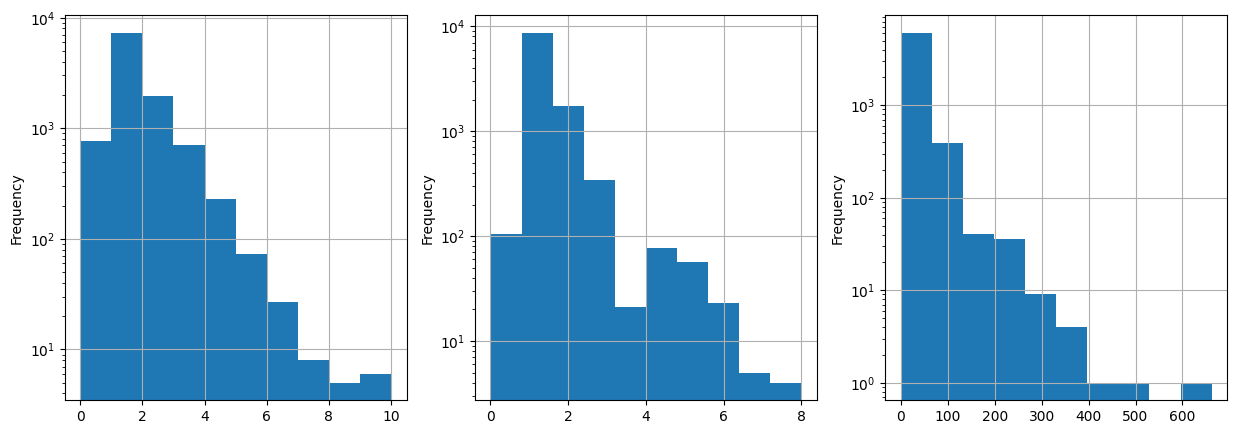

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
preview['Bedrooms'].plot.hist(grid = True)
plt.yscale("log")
#plt.xlabel('bedrooms')

plt.subplot(1,3,2)
preview['Bathrooms'].plot.hist(grid = True)
plt.yscale("log")
#plt.xlabel('algo')

plt.subplot(1,3,3)
preview['Cleaning Fee'].plot.hist(grid = True)
plt.yscale("log")

#Log scale is used so we can see better possile

In [ ]:
#We'll check for that high cleaning fee value, to see if it is an outlier
print(preview[preview['Cleaning Fee']> 500].T.to_string())

                                                                                                                                     8778
Interaction                          Please let me know about your arrival and departure time and your preferences for bed configuration.
Host Since                                                                                                                     2015-06-25
Host Location                                                                                          Madrid, Community of Madrid, Spain
Host Response Time                                                                                                                      3
Host Response Rate                                                                                                                  100.0
Host Neighbourhood                                                                                                                    NaN
Host Listings Count               

We have an outlier that we can take out

Now, we can check the variables correlation with our target variable (price)

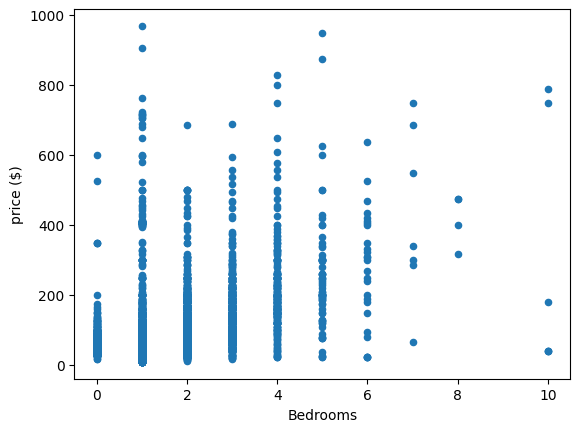

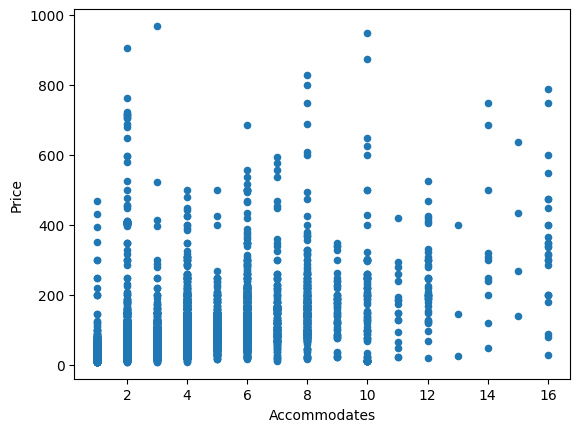

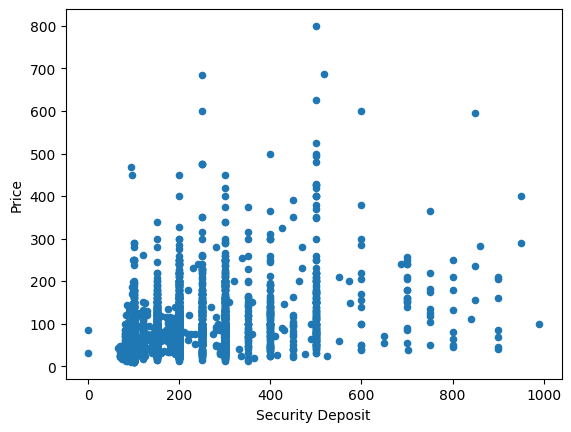

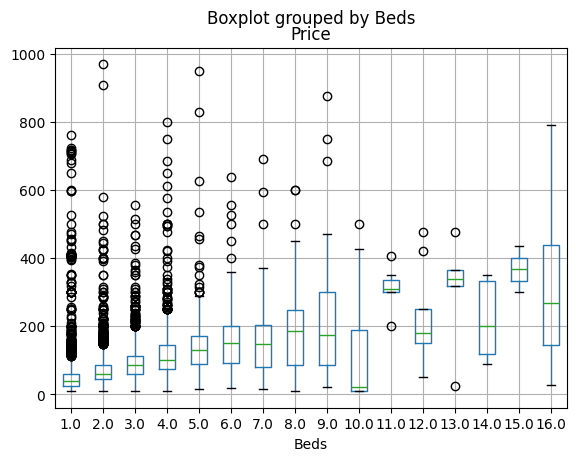

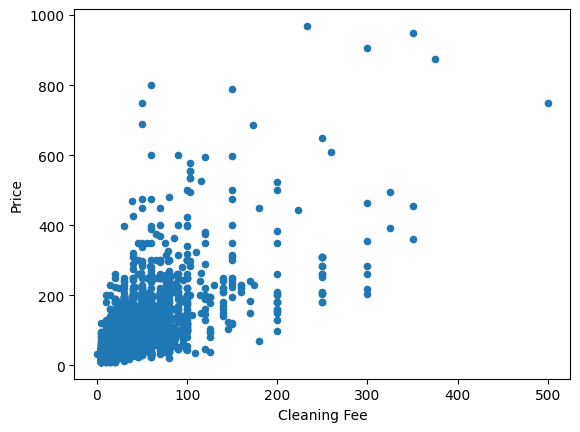

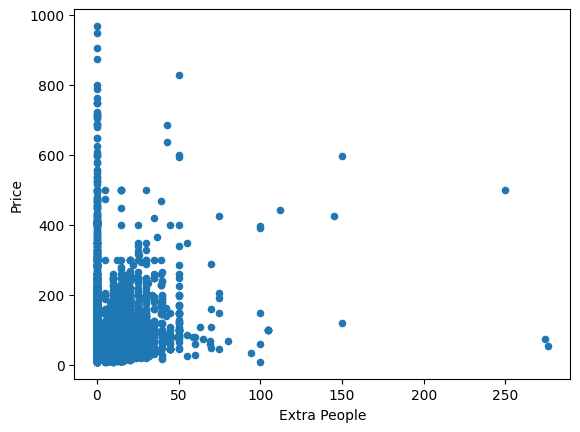

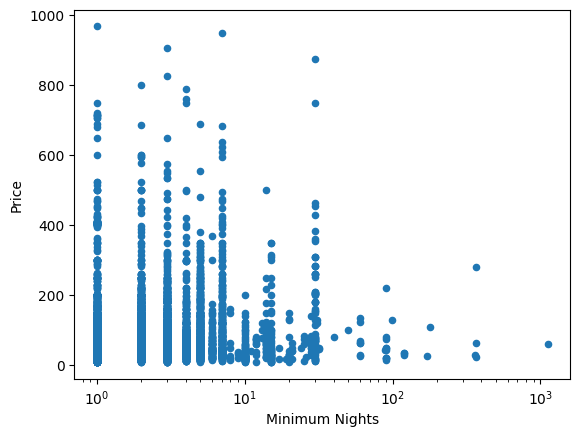

In [107]:
preview.plot(kind = 'scatter',x='Bedrooms',y = 'Price')

plt.ylabel('price ($)')
plt.show()

preview.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.show()

preview.plot(kind = 'scatter',x='Security Deposit',y = 'Price')
plt.show()

preview.boxplot(by='Beds',column = 'Price')
plt.show()

preview.plot(kind = 'scatter',x='Cleaning Fee',y = 'Price')
plt.show()

preview.plot(kind = 'scatter',x='Extra People',y = 'Price')
plt.show()

preview.plot(kind = 'scatter',x='Minimum Nights',y = 'Price')
plt.xscale("log")
plt.show()


Not much can be taken from this graphics, as there is no clear relationship between the variables and the target, 
we can use describe to check if there is outliers in some columns, by checking mean, 75% and max values

In [81]:
print(preview.describe().to_string())

       Host Response Rate  Host Listings Count  Host Total Listings Count      Latitude     Longitude  Accommodates     Bathrooms      Bedrooms          Beds         Price  Security Deposit  Cleaning Fee  Guests Included  Extra People  Minimum Nights  Maximum Nights  Availability 30  Availability 60  Availability 90  Availability 365  Number of Reviews  Review Scores Rating  Review Scores Accuracy  Review Scores Cleanliness  Review Scores Checkin  Review Scores Communication  Review Scores Location  Review Scores Value  Calculated host listings count  Reviews per Month
count         9661.000000         11083.000000               11083.000000  11085.000000  11085.000000  11085.000000  11043.000000  11065.000000  11050.000000  11071.000000       4758.000000   6557.000000     11085.000000  11085.000000    11085.000000    11085.000000     11085.000000     11085.000000     11085.000000      11085.000000       11085.000000           8586.000000             8566.000000                8571.000

In [ ]:
#Outliers

#Host listings count >6

#preview[preview['Host Total Listings Count'] > 6]  #All good, no need to take out nothing


#security deposit > 200
#preview[preview['Security Deposit'] > 300] #all good

#Cleaning fee > 400
preview[preview['Cleaning Fee'] > 400].T #two to take out


,6430,8778
Experiences Offered,none,none
Host Since,2015-04-27,2015-06-25
Host Location,"Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain"
Host Response Time,within a few hours,within an hour
Host Response Rate,100.0,100.0
Host Neighbourhood,La Latina,NaN
Host Total Listings Count,68.0,1.0
Host Verifications,"email,phone,reviews,jumio","email,phone,reviews,jumio,offline_government_i..."
Street,"Madrid, Comunidad de Madrid 28035, Spain","København, Denmark"
Neighbourhood,NaN,NaN


In [ ]:
#Extra People > 15
preview[preview['Extra People'] > 100].T #14 out


,373,1621,2490,3472,3542,4607,4787,6259,7727,7837,8326,8778,10234,10775
Experiences Offered,none,none,none,none,none,none,none,none,none,none,none,none,none,none
Host Since,2013-06-12,2016-06-23,2016-02-07,2016-11-08,2012-02-10,2015-06-11,2016-11-08,2016-02-08,2016-11-08,2012-11-20,2016-11-08,2015-06-25,2016-11-08,2011-06-26
Host Location,"Copenhagen, Capital Region of Denmark, Denmark",ES,ES,"Barcelona, Catalonia, Spain","Madrid, Madrid, Spain","Barranquilla, Atlantico, Colombia","Barcelona, Catalonia, Spain",FR,"Barcelona, Catalonia, Spain","Palma de Mallorca, Balearic Islands, Spain","Barcelona, Catalonia, Spain","Madrid, Community of Madrid, Spain","Barcelona, Catalonia, Spain",Hong Kong
Host Response Time,NaN,within a few hours,NaN,within an hour,within an hour,NaN,within an hour,within a day,within an hour,within an hour,within an hour,within an hour,within an hour,within an hour
Host Response Rate,NaN,100.0,NaN,100.0,100.0,NaN,100.0,100.0,100.0,97.0,100.0,100.0,100.0,100.0
Host Neighbourhood,NaN,Trafalgar,Malasaña,NaN,Cortes,Embajadores,NaN,Malasaña,NaN,Palacio,NaN,NaN,NaN,Tsim Sha Tsui
Host Total Listings Count,1.0,1.0,1.0,162.0,12.0,2.0,162.0,1.0,162.0,68.0,162.0,1.0,162.0,1.0
Host Verifications,"email,phone,reviews,jumio","email,phone,google,reviews","email,phone","email,phone,reviews,work_email","email,phone,reviews,jumio","email,phone,reviews,jumio","email,phone,reviews,work_email","email,phone,reviews,jumio","email,phone,reviews,work_email","email,phone,facebook,reviews,jumio","email,phone,reviews,work_email","email,phone,reviews,jumio,offline_government_i...","email,phone,reviews,work_email","email,phone,facebook,reviews,jumio"
Street,"Frederiksberg, 2000, Denmark","Trafalgar, Madrid, Comunidad de Madrid 28010, ...","Malasaña, Madrid, Comunidad de Madrid 28004, S...","Barcelona, Barcelona 08010, Spain","El Tréntaiseis, Madrid, Community of Madrid 28...","Embajadores, Madrid, Comunidad de Madrid 28012...","Barcelona, Barcelona 08010, Spain","Malasaña, Madrid, Comunidad de Madrid 28004, S...","Barcelona, Barcelona 08010, Spain","Deià, Illes Balears 07179, Spain","Barcelona, Barcelona 08010, Spain","København, Denmark","Barcelona, Barcelona 08010, Spain","F 10A HAU FOOK STREET, Tsim Sha Tsui, Kowloon,..."
Neighbourhood,NaN,Trafalgar,Malasaña,NaN,El Tréntaiseis,Embajadores,NaN,Malasaña,NaN,NaN,NaN,NaN,NaN,Tsim Sha Tsui


In [108]:
#minimum nights

preview[preview['Minimum Nights'] > 100]

,Experiences Offered,Host Since,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Total Listings Count,Host Verifications,Street,Neighbourhood,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
278,none,2014-09-18,"Madrid, Community of Madrid, Spain",within an hour,98.0,Aluche,46.0,"email,phone,reviews,jumio","Aluche, Madrid, Comunidad de Madrid 28011, Spain",Aluche,...,NaN,NaN,NaN,NaN,NaN,NaN,moderate,44.0,0.08,"Host Has Profile Pic,Host Identity Verified,Is..."
2381,none,2016-07-01,ES,NaN,NaN,NaN,1.0,"email,phone","Madrid, Comunidad de Madrid 28005, Spain",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1.0,0.14,"Host Has Profile Pic,Requires License,Instant ..."
2583,none,2013-08-01,"Madrid, Community of Madrid, Spain",NaN,NaN,Arganzuela,1.0,"email,phone,reviews","Arganzuela, Madrid, Comunidad de Madrid 28012,...",Arganzuela,...,8.0,8.0,9.0,9.0,9.0,8.0,moderate,1.0,0.39,"Host Has Profile Pic,Is Location Exact,Require..."
4913,none,2015-07-07,España,NaN,NaN,NaN,1.0,"email,phone,reviews","Madrid, Comunidad de Madrid 28038, Spain",NaN,...,9.0,9.0,10.0,10.0,9.0,9.0,strict,1.0,1.29,"Host Has Profile Pic,Requires License"
5593,none,2016-07-14,"Madrid, Community of Madrid, Spain",within an hour,100.0,NaN,3.0,"email,phone,reviews,jumio,government_id","Madrid, Community of Madrid, Spain",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,3.0,NaN,"Host Has Profile Pic,Host Identity Verified,Re..."
7285,none,2014-08-07,"Madrid, Community of Madrid, Spain",NaN,NaN,Embajadores,2.0,"email,phone,reviews","Embajadores, Madrid, Comunidad de Madrid 28012...",Embajadores,...,10.0,10.0,10.0,10.0,10.0,10.0,moderate,2.0,2.25,"Host Is Superhost,Host Has Profile Pic,Is Loca..."
7741,none,2014-02-16,"Madrid, Community of Madrid, Spain",NaN,NaN,Usera,1.0,"email,phone,reviews","Usera, Madrid, Community of Madrid 28026, Spain",Usera,...,9.0,10.0,9.0,10.0,10.0,10.0,strict,1.0,0.20,"Host Has Profile Pic,Is Location Exact,Require..."
7856,none,2014-01-07,"Madrid, Community of Madrid, Spain",NaN,NaN,NaN,2.0,"email,phone","Madrid, Comunidad de Madrid 28003, Spain",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,strict,1.0,NaN,"Host Has Profile Pic,Requires License"
9395,none,2010-01-31,"Madrid, Madrid, Spain",within a few hours,100.0,Castellana,7.0,"email,phone,facebook,reviews","Castellana, Madrid, Madrid 28006, Spain",Castellana,...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,4.0,NaN,"Host Has Profile Pic,Is Location Exact,Require..."
9709,none,2012-12-15,"Madrid, Community of Madrid, Spain",NaN,NaN,Palacio,1.0,"email,phone,reviews","Palacio, Madrid, Community of Madrid 28013, Spain",Palacio,...,8.0,6.0,10.0,10.0,10.0,8.0,strict,1.0,0.25,"Host Has Profile Pic,Is Location Exact,Require..."


So now, worked with data in preview, we can wrap it up all together in a single cell

In [110]:
# Load the data

data_house = pd.read_csv('./data/airbnb_train.csv', sep=';')

#Take out columns
col_to_drop = ['Space', 'Medium Url', 'Host Acceptance Rate','Unnamed: 0','Host URL', 'Host Thumbnail Url','Thumbnail Url','Notes',
               'License', 'XL Picture Url','Jurisdiction Names','Picture Url','Amenities','Neighborhood Overview','Host Listings Count',
               'Monthly Price','Square Feet','Host About','Has Availability','Geolocation','Description','Weekly Price','Last Review',
               'Calendar last Scraped','Scrape ID','Listing Url','ID','Last Scraped','Interaction','House Rules','Host Picture Url',
               'Calendar Updated','Transit','Host ID','Summary','First Review','Name','Host Name','Access']

data_house = data_house.drop(col_to_drop, axis=1)

#Take out outliers
#here, we have to keep the ones that NOT match the restrictions given above, this menas, ask for the opposite
#Cleaning Fee, Extra People, Minimum Nights

data_house = data_house[data_house['Cleaning Fee'] < 400]
data_house = data_house[data_house['Extra People'] < 100]
data_house = data_house[data_house['Minimum Nights'] < 100]

#Features Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_house['Host Response Time'] = le.fit_transform(data_house['Host Response Time'])
data_house['Host Response Time']

data_house = pd.get_dummies(data_house, columns=['Room Type', 'Bed Type', 'Experiences Offered', 'Cancellation Policy'], drop_first=True)



Now, the same process to test

In [111]:
# Load the data

data_test = pd.read_csv('./data/airbnb_test.csv', sep=';')

#Take out columns
col_to_drop = ['Space', 'Medium Url', 'Host Acceptance Rate','Unnamed: 0','Host URL', 'Host Thumbnail Url','Thumbnail Url','Notes',
               'License', 'XL Picture Url','Jurisdiction Names','Picture Url','Amenities','Neighborhood Overview','Host Listings Count',
               'Monthly Price','Square Feet','Host About','Has Availability','Geolocation','Description','Weekly Price','Last Review',
               'Calendar last Scraped','Scrape ID','Listing Url','ID','Last Scraped','Interaction','House Rules','Host Picture Url',
               'Calendar Updated','Transit','Host ID','Summary','First Review','Name','Host Name','Access']

data_test = data_test.drop(col_to_drop, axis=1)

#Take out outliers
#here, we have to keep the ones that NOT match the restrictions given above, this menas, ask for the opposite
#Cleaning Fee, Extra People, Minimum Nights

data_test = data_test[data_test['Cleaning Fee'] < 400]
data_test = data_test[data_test['Extra People'] < 100]
data_test = data_test[data_test['Minimum Nights'] < 100]

#Features Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_test['Host Response Time'] = le.fit_transform(data_test['Host Response Time'])
data_test['Host Response Time']

data_test = pd.get_dummies(data_test, columns=['Room Type', 'Bed Type', 'Experiences Offered', 'Cancellation Policy'], drop_first=True)

In [114]:
data_house.head()

,Host Since,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,...,Experiences Offered_none,Experiences Offered_romantic,Experiences Offered_social,Cancellation Policy_flexible_new,Cancellation Policy_moderate,Cancellation Policy_moderate_new,Cancellation Policy_strict,Cancellation Policy_strict_new,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
0,2012-11-20,"Palma de Mallorca, Balearic Islands, Spain",3,97.0,Palacio,68.0,"email,phone,facebook,reviews,jumio","Sóller, Balearic Islands 07100, Spain",NaN,Sóller,...,True,False,False,False,False,False,False,False,False,True
2,2014-09-19,"Madrid, Community of Madrid, Spain",2,75.0,Rios Rosas,164.0,"email,phone,reviews","La Latina, Madrid, Comunidad de Madrid 28005, ...",La Latina,Embajadores,...,True,False,False,False,False,False,True,False,False,False
3,2012-01-23,"Vienna, Wien, Austria",3,98.0,Margareten,21.0,"email,phone,jumio","Landstraße, Wien, Wien 1030, Austria",Landstraße,Landstra§e,...,True,False,False,False,False,False,False,False,False,False
7,2015-06-26,"Madrid, Community of Madrid, Spain",4,NaN,NaN,1.0,"email,phone,facebook,reviews,jumio,government_id","Madrid, Comunidad de Madrid 28005, Spain",NaN,Embajadores,...,True,False,False,False,False,False,False,False,False,False
10,2013-02-10,"Paris, Île-de-France, France",4,NaN,Gare du Nord - Gare de I'Est,1.0,"email,phone,facebook,reviews,manual_offline,jumio","Gare du Nord - Gare de I'Est, Paris, Île-de-Fr...",Gare du Nord - Gare de I'Est,Entrepôt,...,True,False,False,False,False,False,False,False,False,False
